In [2]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt


I approached this problem by trying to find an appropriate amount of data points $n$ to generate such that the covariance converges. At $n = 100,000$, the covariance seemed to converge.

From there, I ran simulations using an appropriate number of samples and plotted a histogram to see where covariance converged, which appears to be around .75

In [15]:
def simulator(n):
    X = expon.rvs(size=n, scale=1)
    Y = np.exp(X/3)
    blop = np.zeros(n)
    for i in range(2,len(X)):
         blop[i] = np.cov(X[0:i],Y[0:i])[1,1]
    final = np.cov(X,Y)
    plt.plot(blop)
    print('Covariance Matrix: \n', final)

Covariance Matrix: 
 [[ 1.22062541  0.84239613]
 [ 0.84239613  0.6376531 ]]


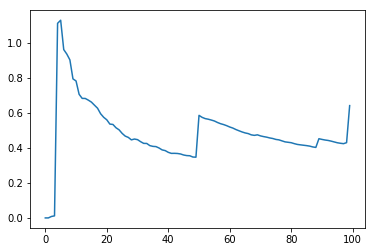

In [36]:
simulator(100)

Covariance Matrix: 
 [[ 1.00215594  0.78222349]
 [ 0.78222349  0.77251235]]


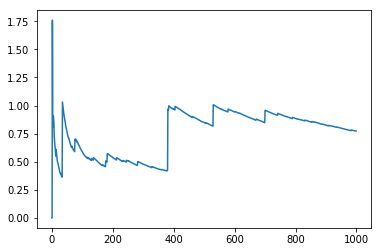

In [37]:
simulator(1000)

Covariance Matrix: 
 [[ 0.99117294  0.73952201]
 [ 0.73952201  0.73482778]]


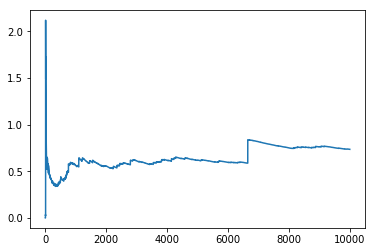

In [42]:
simulator(10000)

Covariance Matrix: 
 [[ 1.00548062  0.75747421]
 [ 0.75747421  0.74465214]]


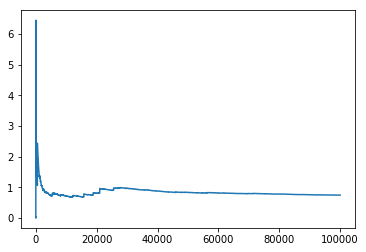

In [44]:
simulator(100000)

In [19]:
def new_simulator(n, runs):
    blop = np.zeros(runs)
    for i in range(runs):
        X = expon.rvs(size=n, scale=1)
        Y = np.exp(X/3)
        blop[i] = np.cov(X,Y)[1,1]
    plt.xlim((0, 1.5))
    plt.hist(blop, runs, density=1, alpha=0.75)
    print('Mean Approximation: ',np.mean(blop))

Approximation:  0.747778937911


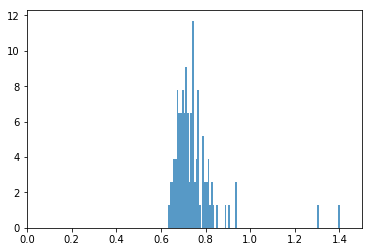

In [20]:
#100 simulations

new_simulator(100000,100)

Approximation:  0.741185845998


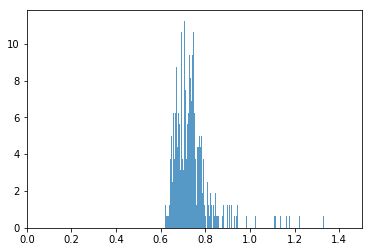

In [21]:
#1000 simulations

new_simulator(100000,1000)

Approximation:  0.748544573486


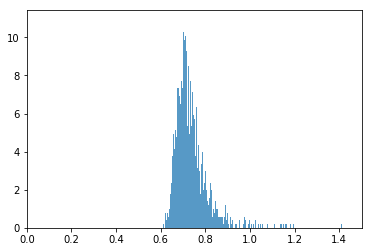

In [22]:
#10000 simulations

new_simulator(100000,10000)

Approximation:  0.749240793333


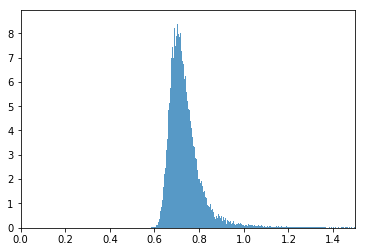

In [23]:
#100000 simulations

new_simulator(100000,100000)

In [3]:
from scipy.stats import poisson

if switch $max\{n\geq0; \prod_{i=1}^n U_i^3 \geq exp(-12)\}$ 

to $max\{n\geq0; \prod_{i=1}^n -3ln(U_i) \leq 12\}$ 

it ends up being the inverse transformation of the exponential distribution $\sim Exp(3)$ which means that the expectations and probabilities should look like that of a poisson distribution with $\lambda = 3$, whereby the expectation $E[X] = 3$

In [4]:
#poisson pmf with lambda=3

pois = [poisson.pmf(i,3) for i in range(7)]
for i in range(len(pois)):
    print('P(N =',i,'): ',pois[i])

P(N = 0 ):  0.0497870683679
P(N = 1 ):  0.149361205104
P(N = 2 ):  0.224041807655
P(N = 3 ):  0.224041807655
P(N = 4 ):  0.168031355742
P(N = 5 ):  0.100818813445
P(N = 6 ):  0.0504094067225


In [19]:
n = np.zeros(1000)
for i in range(1000):
    for j in range(0,50):
        if np.product(uniform.rvs(size=j)**3) >= np.exp(-12):
            n[i] = j
        else:
            break

In [21]:
print('E[X]: ', np.mean(n))
print('E[X^2]: ', np.mean(n**2))

E[X]:  3.03
E[X^2]:  10.958


In [36]:
#pmf generated for problem

probs = [np.mean(n==i) for i in range(7)]
for i in range(len(probs)):
    print('P(N =',i,'): ',probs[i])

P(N = 0 ):  0.025
P(N = 1 ):  0.099
P(N = 2 ):  0.221
P(N = 3 ):  0.302
P(N = 4 ):  0.215
P(N = 5 ):  0.107
P(N = 6 ):  0.029



The simulated and theoretical results are almost identical in both $N=100$ and $N=1000$ scenarios, which further shows the law of large numbers at work as the mean (simulated) converges towards expectation (theoretical)

In [24]:
def profit(Y,theta):
    if Y < theta: 
        return (1.5*Y + 0.2*(theta-Y))
    else:
        return (1.5*theta)
thetas = [i for i in range(50,101)]
theoretical = [(-0.013*i**2 + 2.8*i - 32.5) for i in range(50,101)]

In [28]:
def prof_gen(n):
    profits = np.zeros(len(thetas))
    Ys = uniform.rvs(loc=50, scale=50, size=n)
    for i in range(len(thetas)):
        temp = np.zeros(n)
        for j in range(len(Ys)):
            temp[j] = profit(Ys[j],thetas[i])
        profits[i] = np.mean(temp)
    
    plt.ylabel('Profit')
    plt.xlabel('Theta')
    plt.plot([x for x in range(50,101)], profits)
    plt.plot([x for x in range(50,101)], theoretical)
    plt.legend(('Simulated', 'Theoretical'))

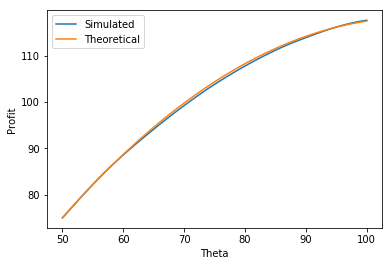

In [31]:
prof_gen(100)

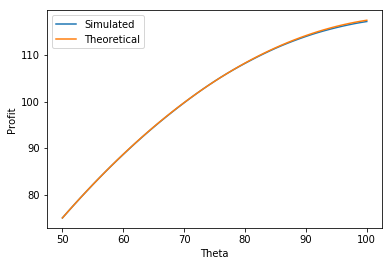

In [30]:
prof_gen(1000)

In [6]:
from scipy.stats import uniform
from scipy.integrate import quad

For this we can partially solve the integral and leave the rest to simulation using $X \sim unif(x) \in [0,3]$

$\int_0^3\int_0^x Sin(yx) = \int_0^3 \frac{-Cos(x^2) + 1}{x}$

This one seems to converge towards 1.3595 pretty rapidly (100,000 simulated RVs); this number is consistent with the below numerical integration 

In [5]:
def integrand(r):
    return (-np.cos(r**2) + 1)/r
quad(integrand,0,3)[0]

1.359546355452309

In [6]:
def int_sim(n):
    r = uniform.rvs(loc=0, scale=3, size=n)
    blop = (-np.cos(r**2) + 1)/r
    print('Expected Value = ',3*np.mean(blop))
    plt.hist(blop, density=1, alpha=0.75)

Expected Value =  0.940865846949


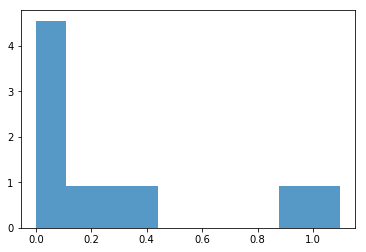

In [7]:
int_sim(10)

Expected Value =  1.34193260637


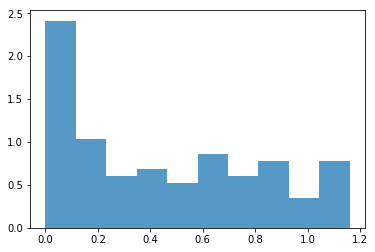

In [8]:
int_sim(100)

Expected Value =  1.32615743107


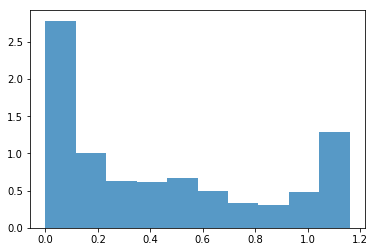

In [9]:
int_sim(1000)

Expected Value =  1.36318102545


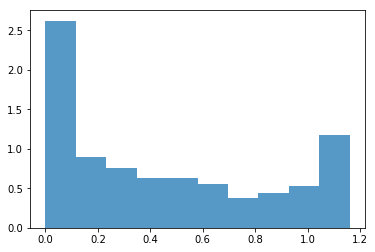

In [10]:
int_sim(10000)

Expected Value =  1.3587389262


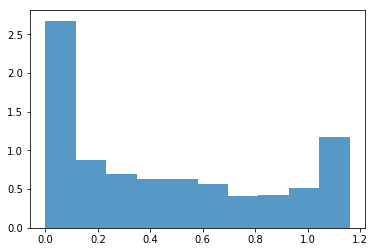

In [11]:
int_sim(100000)

Expected Value =  1.36143093902


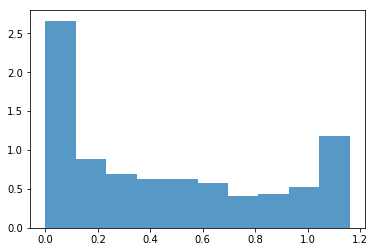

In [12]:
int_sim(1000000)

Expected Value =  1.35974736112


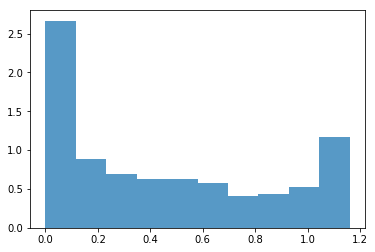

In [13]:
int_sim(10000000)

Expected Value =  1.35956403324


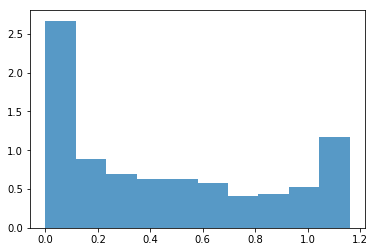

In [14]:
int_sim(100000000)